# Compute energy smearing matrix

Please note that the actual experimental parameters have been randomized.

In [1]:
%matplotlib inline
import os, pickle
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm
from matplotlib.ticker import NullFormatter
from matplotlib import cm
from scipy import interpolate
from scipy.stats import poisson

In [2]:
qy_cutoff = 1.0

Where there are these many events passing the cuts:

## Efficieinces

In [3]:
true_energy_bins = np.linspace(0, 10, 100) # keV
measured_energy_bins = np.linspace(0, 1000, 100) # pe

def acceptance_function(E, cutoff = 150):
    """Apply the analysis efficiencies
    
    E is a histogram of events binned in measured energy (pe),
    represented as a numpy array.
    
    Cutoff is the lower bound on the analysis
    """
    p0 = 0.5
    p1 = 0
    p2 = 0
    answer = p0 + p1 * np.log(E) + p2 * np.sqrt(E)

    # Set bins to zero if you're below the analysis threshold
    answer[E<cutoff] = 0
    return answer
    

/Users/tunnell/anaconda3/envs/s2only/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log
/Users/tunnell/anaconda3/envs/s2only/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in multiply


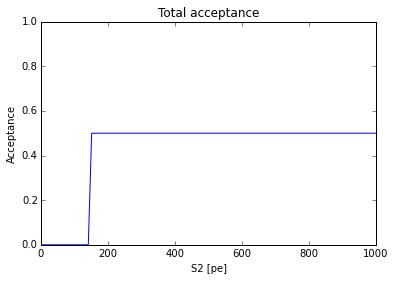

In [5]:
plt.figure()
plt.plot(measured_energy_bins, acceptance_function(measured_energy_bins))
plt.title('Total acceptance')
plt.ylabel('Acceptance')
plt.ylim(0,1)
plt.xlabel('S2 [pe]')

plt.savefig('plots/total_acceptance.eps')
plt.savefig('plots/total_acceptance.png')

/Users/tunnell/anaconda3/envs/s2only/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log
/Users/tunnell/anaconda3/envs/s2only/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in multiply


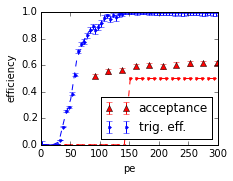

In [6]:
def trigger_efficiency(pe):
    # Measured from run 10
    x = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.1867, 97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5, 137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5, 177.5, 182.5, 187.5, 192.5, 197.5, 202.5, 207.5, 212.5, 217.5, 222.5, 227.5, 232.5, 237.5, 242.5, 247.5, 252.5, 257.5, 262.5, 267.5, 272.5, 277.5, 282.5, 287.5, 292.5, 297.5, 302.5, 307.5, 312.5, 317.5, 322.5, 327.5, 332.5, 337.5, 342.5, 347.5, 352.5, 357.5, 362.5, 367.5, 372.5, 377.5, 382.5, 387.5, 392.5, 397.5, 402.5, 407.5, 412.5, 417.5, 422.5, 427.5, 432.5, 437.5, 442.5, 447.5, 452.5, 457.5, 462.5, 467.5, 472.5, 477.5, 482.5, 487.5, 492.5, 497.5, 502.5, 507.5, 512.5, 517.5, 522.5, 527.5, 532.5, 537.5, 542.5, 547.5, 552.5, 557.5, 562.5, 567.5, 572.5, 577.5, 582.5, 587.5, 592.5, 597.5, 602.5, 607.5, 612.5, 617.5, 622.5, 627.5, 632.5, 637.5, 642.5, 647.5, 652.5, 657.5, 662.5, 667.5, 672.5, 677.5, 682.5, 687.5, 692.5, 697.5, 702.5, 707.5, 712.5, 717.5, 722.5, 727.5, 732.5, 737.5, 742.5, 747.5, 752.5, 757.5, 762.5, 767.5, 772.5, 777.5, 782.5, 787.5, 792.5, 797.5, 802.5, 807.5, 812.5, 817.5, 822.5, 827.5, 832.5, 837.5, 842.5, 847.5, 852.5, 857.5, 862.5, 867.5, 872.5, 877.5, 882.5, 887.5, 892.5, 897.5, 902.5, 907.5, 912.5, 917.5, 922.5, 927.5, 932.5, 937.5, 942.5, 947.5, 952.5, 957.5, 962.5, 967.5, 972.5, 977.5, 982.5, 987.5, 992.5, 997.5,]
    y = [0, 0.00185185, 0.000820008, 0.000809692, 0.0012472, 0.00492117, 0.0336743, 0.135222, 0.256666, 0.283748, 0.384668, 0.529958, 0.70548, 0.758725, 0.776471, 0.824363, 0.866221, 0.89272, 0.862005, 0.890805, 0.916667, 0.959184, 0.97561, 0.951219, 0.979798, 0.962025, 0.986667, 0.987654, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.956522,]
    
    yminus = [0, 0.000620826, 0.000141143, 8.7824e-05, 0.000102523, 0.000260199, 0.00105931, 0.003467, 0.0068576, 0.00943807, 0.0126197, 0.0145127, 0.0155511, 0.0169179, 0.0187914, 0.0208379, 0.0204822, 0.0201486, 0.0261563, 0.0251108, 0.0261755, 0.0234647, 0.0169552, 0.0277971, 0.0181676, 0.0259526, 0.0193798, 0.0179876, 0.0137462, 0.011774, 0.0150028, 0.016753, 0.0214432, 0.016753, 0.0160508, 0.016753, 0.0218511, 0.0165122, 0.0196129, 0.0248222, 0.0192837, 0.0192837, 0.0236503, 0.0231733, 0.0236503, 0.0252069, 0.0236503, 0.0257724, 0.0297805, 0.0227151, 0.0199536, 0.0218511, 0.0241474, 0.0246658, 0.0283128, 0.0276319, 0.0227151, 0.0231733, 0.0252069, 0.0269829, 0.0241474, 0.0222747, 0.0246658, 0.0314088, 0.0276319, 0.0246658, 0.0276319, 0.0290281, 0.0297805, 0.0432247, 0.030573, 0.0388412, 0.0322915, 0.0352649, 0.0402001, 0.0467412, 0.0322915, 0.0416576, 0.0363815, 0.0388412, 0.030573, 0.0449142, 0.0352649, 0.0290281, 0.0432247, 0.0342147, 0.0375711, 0.0314088, 0.0402001, 0.0416576, 0.0363815, 0.0402001, 0.030573, 0.0532378, 0.0375711, 0.0363815, 0.030573, 0.0388412, 0.0402001, 0.0290281, 0.0276319, 0.0388412, 0.0432247, 0.0508805, 0.0363815, 0.0322915, 0.0449142, 0.0432247, 0.0532378, 0.0388412, 0.0375711, 0.061831, 0.0388412, 0.0586742, 0.0402001, 0.0532378, 0.0402001, 0.0432247, 0.0467412, 0.0586742, 0.0388412, 0.0467412, 0.0375711, 0.0449142, 0.0653467, 0.0487232, 0.0653467, 0.0352649, 0.0467412, 0.0532378, 0.055824, 0.0467412, 0.055824, 0.0352649, 0.0276319, 0.0432247, 0.0388412, 0.0375711, 0.0449142, 0.0332253, 0.0432247, 0.0532378, 0.0449142, 0.0363815, 0.061831, 0.0508805, 0.108532, 0.0449142, 0.055824, 0.0449142, 0.061831, 0.0532378, 0.055824, 0.0586742, 0.0487232, 0.061831, 0.061831, 0.0487232, 0.0363815, 0.0449142, 0.0416576, 0.0532378, 0.0692861, 0.0532378, 0.061831, 0.061831, 0.0467412, 0.0402001, 0.0388412, 0.0508805, 0.0532378, 0.0532378, 0.061831, 0.0653467, 0.0532378, 0.0508805, 0.0508805, 0.0508805, 0.0467412, 0.0912977, 0.0692861, 0.055824, 0.055824, 0.055824, 0.0432247, 0.0586742, 0.055824, 0.0653467, 0.0737307, 0.0449142, 0.0487232, 0.0508805, 0.0586742, 0.0653467, 0.0508805, 0.0508805, 0.0363815, 0.0388412, 0.0508805, 0.0587547,]
    yplus = [0.030573, 0.000800584, 0.000159452, 9.46682e-05, 0.000108462, 0.000269658, 0.0010812, 0.00351773, 0.00693852, 0.00956617, 0.012724, 0.014479, 0.0152386, 0.016395, 0.0180698, 0.0196158, 0.0188529, 0.0181459, 0.0236798, 0.0221263, 0.0219734, 0.0171106, 0.0116209, 0.0203675, 0.0113455, 0.0179647, 0.00967133, 0.00896105, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0308794,]
    
    plt.errorbar(x, y, fmt='.', yerr=(yminus, yplus), label='trig. eff.')
    
    return np.interp(pe, x, y)

size = 3.1693
plt.figure(figsize=(size, 0.75*size))

plt.plot(measured_energy_bins,
         acceptance_function(measured_energy_bins),
         '--.', color='red')

x = [91.5, 114.5, 137.5, 160.5, 183.5, 206.5, 229.5, 252.5, 275.5, 298.5, 321.5, 344.5, 367.5, 390.5, 413.5, 436.5, 459.5, 482.5, 505.5, 528.5, 551.5, 574.5, 597.5, 620.5, 643.5, 666.5, 689.5, 712.5, 735.5, 758.5, 781.5, 804.5, 827.5, 850.5, 873.5, 896.5, 919.5, 942.5, 965.5, 988.5]
y = [0.5208752751350403, 0.5534624457359314, 0.5655086636543274, 0.5939598083496094, 0.6016217470169067, 0.5910416841506958, 0.6053590774536133, 0.6142134070396423, 0.6171691417694092, 0.6179883480072021, 0.6152552366256714, 0.6160879731178284, 0.6188319325447083, 0.6300469636917114, 0.6332888603210449, 0.6288020610809326, 0.6494696140289307, 0.6440762281417847, 0.6450938582420349, 0.6237490773200989, 0.6333166360855103, 0.6395620703697205, 0.6379808187484741, 0.6564419269561768, 0.6734371185302734, 0.6342695355415344, 0.6381530165672302, 0.6378186941146851, 0.6269301176071167, 0.6374047994613647, 0.6275669932365417, 0.6614735126495361, 0.6372666954994202, 0.6627113819122314, 0.638416588306427, 0.6492322087287903, 0.6646038293838501, 0.666368305683136, 0.647190511226654, 0.6572174429893494]
yminus, yplus = zip(*[(0.015537756435489, 0.015537756435489), (0.01623771409714524, 0.01623771409714524), (0.015327782290291537, 0.015327782290291537), (0.01661522276911347, 0.01661522276911347), (0.01601966879482559, 0.01601966879482559), (0.01676072935247934, 0.01676072935247934), (0.016276188186524522, 0.016276188186524522), (0.0172963907389622, 0.0172963907389622), (0.016854139698929266, 0.016854139698929266), (0.0161488052212311, 0.0161488052212311), (0.016470282001641183, 0.016470282001641183), (0.016950197632603727, 0.016950197632603727), (0.017181902618759497, 0.017181902618759497), (0.01735477132372383, 0.01735477132372383), (0.01708720307521821, 0.01708720307521821), (0.017974941623529767, 0.017974941623529767), (0.017063701433683593, 0.017063701433683593), (0.01719582806776309, 0.01719582806776309), (0.018075214725834555, 0.018075214725834555), (0.017793140296277998, 0.017793140296277998), (0.01866232989650814, 0.01866232989650814), (0.017468732544839796, 0.017468732544839796), (0.01781258335252456, 0.01781258335252456), (0.018304402772145557, 0.018304402772145557), (0.018000586731251194, 0.018000586731251194), (0.019637447172175432, 0.019637447172175432), (0.018739576570994603, 0.018739576570994603), (0.020137388758218775, 0.020137388758218775), (0.018674610280439107, 0.018674610280439107), (0.018539497350903916, 0.018539497350903916), (0.019465923973405762, 0.019465923973405762), (0.019235594071943325, 0.019235594071943325), (0.020466501086280488, 0.020466501086280488), (0.019930269136247614, 0.019930269136247614), (0.020506504238123682, 0.020506504238123682), (0.020319428190820853, 0.020319428190820853), (0.019711834039852164, 0.019711834039852164), (0.02089743032756345, 0.02089743032756345), (0.02004978799413057, 0.02004978799413057), (0.021326355159301157, 0.021326355159301157)])
plt.errorbar(x, y, fmt='^', yerr=(yminus, yplus),
             label='acceptance',
            color='red')

plt.plot(measured_energy_bins,
         trigger_efficiency(measured_energy_bins),
         ls='--',color='blue')


plt.xlim(0,300)
plt.ylim(0,1)
plt.xlabel('pe')
plt.ylabel('efficiency')
plt.legend(loc=4)

for image_type in ['eps', 'png', 'pdf']:
    plt.savefig('plots/response_acceptance.%s' % image_type, bbox_inches='tight')
    

## Energy-smearing matrix

### Inputs

### $Q_y$

TODO: Need to update this with the $Q_y$ from Richard.

In [27]:

def Qy(enr, cut=qy_cutoff):
    """Determine electron yield from Bezrukov
    
    enr is in keV, answer is in number of electrons at interaction point.
    
    Add ref
    """
    ep = enr * (1.05 * np.power(10.,-3.))
    k = 1.65e-1
                                                                                                                                                                                     
    se = k * np.sqrt(ep);
    sn = (np.log(1 + 1.1383 * 1.068 * ep))/(2 *(1.068 * ep + 0.01321 * np.power((1.068 * ep),0.21226) + 0.19593*np.power((1.068*ep),0.5)))
    ratio = 1.09;
    g = 0.032;
    b = 1.38e5                                                                                                                                             

    squiggle = se / sn;

    Ni = (b * ep * squiggle)/(1 + ratio);

    Nq = (4./g) * np.log(1 + (g * Ni)/4.);

    answer = Nq/enr

    # Energy cut so can floor Q_y below it
    answer[enr < cut] = 0
    
    return answer

    
print(Qy(np.array([5])))

[ 5.72148616]


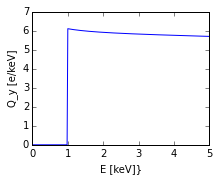

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

size = 3.1693
fig, ax = plt.subplots(figsize=(size, 0.75*size))

x = np.linspace(1e-6, 20, 1000)
y = Qy(x)
ax.plot(x, y)

#ax.plot(x, Qy_NEST(x), '--')
plt.ylim(0,7)
plt.xlim(0,5)

plt.xlabel('E [keV]}')
plt.ylabel('Q_y [e/keV]')

#a = plt.axes([.2, .2, .2, .2], axisbg='y')
#a.plot(x, y)
#plt.xlim(0,4)
#plt.ylim(5,7)
#plt.title('Zoom')
#plt.setp(a, xticks=[1,2,3], yticks=[1,3,5,7])


#plt.savefig('plots/response_limit_qy_nonzero.png', bbox_inches='tight')
for image_type in ['eps', 'png', 'pdf']:
    plt.savefig('plots/response_limit_qy.%s' % image_type, bbox_inches='tight')

plt.show()



### Create an S2

In [10]:
def S2(edep):
    """Compute the measured S2 for a recoil energy
    
    var: edep [kev]
    
    Checked against Marc Weber's:
    double Xenon100NR::GetUncorrectedS2(double Er, double Nq_in, double zz)
    """    
    # Constants
    electron_lifetime = 500 # us
    electron_drift_velocity = 1.74 # mm/us 
    s2_amplification = 19.67
    s2_amplification_sigma = 6.98
    y = 300 # detector height [mm]
    
    # Compute effect of the electron lifetime
    #    integral_0^y e^(-x/k)/y dx = (k-k e^(-y/k))/y
    k = (electron_lifetime * electron_drift_velocity)  # temp variable
    average_electron_lifetime_effect = k * (1 - np.exp(-1 * y/k)) / y
    
    Ne = np.random.poisson(edep * Qy(edep))  # Number of electrons in liquid
    Ng = Ne *  average_electron_lifetime_effect # Number of electrons in gas
    
    answer = np.zeros_like(edep)
    
    answer[Ng > 0] = np.random.normal(loc=s2_amplification * Ng[Ng > 0],
                                       scale=s2_amplification_sigma * np.sqrt(Ng[Ng > 0]))
    answer[answer < 0] = 0
    
    return answer

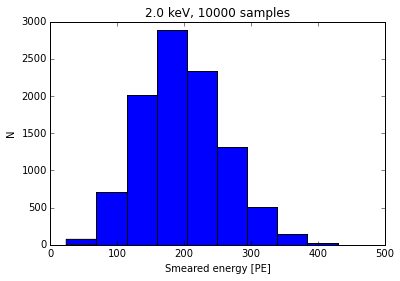

In [12]:
def plot_S2(energy):
    N = 10000
    samples = S2(np.ones(N)*energy)
    plt.hist(samples)
    plt.xlabel('Smeared energy [PE]')
    plt.ylabel('N')
    plt.title('%0.1f keV, %d samples' % (energy, N))
    plt.savefig('plots/response_example_smeared_pe.png')
    plt.show()

plot_S2(2)

In [14]:
Z, binsx, binsy = np.histogram2d([], [],
                    bins=(true_energy_bins,
                        measured_energy_bins))
N = 0

def c(x):
    """ get center"""
    return 0.5*(x[1:]+x[:-1])

In [15]:
def add_points(size = 10):
    """Simulation of many events to build smearing matrix
    """
    trial_energy = true_energy_bins[0] + np.random.random(size) * (true_energy_bins[-1] - true_energy_bins[0])
    
    true_spectra, recon_spectra = smeared_spectra(trial_energy)

    z, binsx, binsy = np.histogram2d(true_spectra, recon_spectra,
                                     bins=(true_energy_bins,
                                           measured_energy_bins))
    
    global N  # Number of simulated events
    global Z  # Resulting 2D bin
    N += size
    Z += z
    return z 


In [16]:
def smeared_spectra(true_energy):
    """Smear energy
    
    Smears into measured energy then applies efficiencies
     true_energy - keV
    """
    size = true_energy.size
    smeared_energy = np.array(S2(true_energy))

    energies = np.vstack((true_energy, smeared_energy.copy()))
    
    # Remove energies that are zero
    energies = energies.compress((smeared_energy != 0), axis=1)
       
    # Trigger efficiency
    mask = np.random.random(energies[1].size) < trigger_efficiency(energies[1])
    energies = energies.compress(mask, axis=1)
   
    # Cut acceptance
    mask =  np.random.random(energies.shape[1]) < acceptance_function(energies[1]) 
    energies = energies.compress(mask,
                                 axis=1)

    return energies



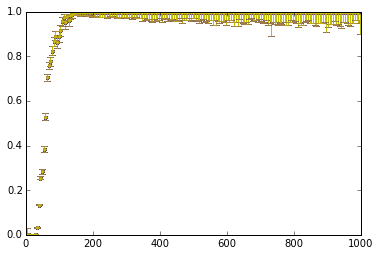

In [17]:
for i in range(1000):
    add_points(100000)
    response_matrix = (Z / (N / true_energy_bins.size))


In [18]:
def plot(x, y, response_matrix):
    plt.figure(figsize=(7,7))
    reds = cm.Reds
    reds.set_bad('white')
    reds.set_under('white')
    
    nullfmt   = NullFormatter()         # no labels  
    
    # definitions for the axes                                                                                             
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left+width+0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure                                                                                      
    plt.figure(1)

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    #axHisty = plt.axes(rect_histy)

    # no labels                                                                                                            
    axHistx.xaxis.set_major_formatter(nullfmt)
    #axHisty.yaxis.set_major_formatter(nullfmt)

    axScatter.imshow(response_matrix, interpolation='nearest', origin='low',
                extent=[true_energy_bins[0], true_energy_bins[-1],
                        measured_energy_bins[0], measured_energy_bins[-1]],
                 aspect='auto',
                 cmap=reds)
                                                                                   
    axScatter.set_xlabel('True energy [keV]')
    axScatter.set_ylabel('Measured signal [pe]')

    # now determine nice limits by hand:                                                                                   
    binwidth = 0.25
    xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
    lim = ( int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((x[0], x[-1]/2))
    axScatter.set_ylim((y[0], y[-1]/2))

    axHistx.plot(c(x), response_matrix.sum(0))
    
    #axHisty.plot(response_matrix.sum(1), c(y))
    
    axHistx.set_xlim(axScatter.get_xlim())
    axHistx.set_ylim((0, 1))
    
    #axHisty.set_xlim((0,1))
    #axHisty.set_ylim(axScatter.get_ylim())
    
    
    #axHisty.set_title("Efficiency")
    axHistx.set_ylabel("Efficiency")
    for extension in ['png', 'eps', 'pdf']:
        plt.savefig('plots/%s_%0.1f.%s' % ('energy_smearing_matrix',
                                           qy_cutoff,
                                           extension), bbox_inches='tight')

    plt.show()        
    return (c(x), response_matrix.sum(0))


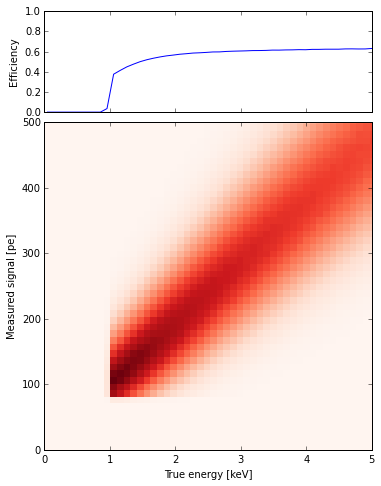

In [19]:
pe90 = plot(true_energy_bins,
            measured_energy_bins,
             np.transpose(response_matrix))

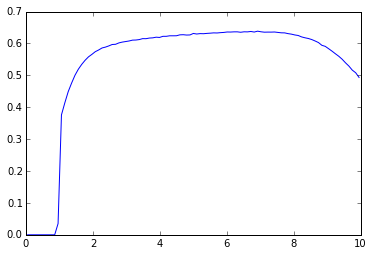

In [20]:
plt.figure()
plt.plot(pe90[0], pe90[1])
#plt.plot(pe60[0], pe60[1])
plt.show()

In [ ]:
def save_response_matrix(x, y, z):
    f = open( "response_matrix_%0.1f.p" % qy_cutoff,
             "wb" )
    pickle.dump( x, f)
    pickle.dump( y, f)
    pickle.dump( z, f)
    f.close()
    
save_response_matrix(true_energy_bins,
                     measured_energy_bins,
                     response_matrix)